<a href="https://colab.research.google.com/github/mo-messidi/Survey-of-Clustering-and-Dimensionality-Reduction-in-ML/blob/master/unsupervised_learning_churn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.mixture import GaussianMixture
from sklearn import metrics
from sklearn import preprocessing
from sklearn.cluster import KMeans
from sklearn.datasets import load_digits

def em(X_train, X_test, y_train, y_test, init_means, no_iter = 1000, component_list = [3,4,5,6,7,8,9,10,11], num_class = 2, toshow = 1):


	array_aic = []
	array_bic = []
	array_homo =[]
	array_comp = []
	array_sil = []
	array_avg_log = []


	for num_classes in component_list:

		clf = GaussianMixture(n_components=num_classes,covariance_type='spherical', max_iter=no_iter, init_params= 'kmeans')
		#     clf = KMeans(n_clusters= num_classes, init='k-means++')

		clf.fit(X_train)

		y_test_pred = clf.predict(X_test)
		#Per sample average log likelihood
		avg_log = clf.score(X_test)
		array_avg_log.append(avg_log)


		#AIC on the test data
		aic = clf.aic(X_test)
		array_aic.append(aic)

		#BIC on the test data
		bic = clf.bic(X_test)
		array_bic.append(bic)

		#Homogenity score on the test data
		homo = metrics.homogeneity_score(y_test, y_test_pred)
		array_homo.append(homo)

		#Completeness score
		comp = metrics.completeness_score(y_test, y_test_pred)
		array_comp.append(comp)

		#Silhoutette score
		sil = metrics.silhouette_score(X_test, y_test_pred, metric='euclidean')
		array_sil.append(sil)



	#Generating plots

	fig1,ax1 = plt.subplots()
	ax1.plot(component_list, array_aic)
	ax1.plot(component_list, array_bic)
	plt.legend(['AIC', 'BIC'])
	plt.xlabel('Number of clusters')
	plt.title('AIC/BIC curve for Expected Maximization')

	fig2,ax2 = plt.subplots()
	ax2.plot(component_list, array_homo)
	ax2.plot(component_list, array_comp)
	ax2.plot(component_list, array_sil)
	plt.legend(['homogenity','completeness','silhoutette'])
	plt.xlabel('Number of clusters')
	plt.title('Performance evaluation scores for Expected Maximization')


	fig3, ax3 = plt.subplots()
	ax3.plot(component_list, array_avg_log)
	plt.xlabel('Number of clusters')
	plt.title('Per sample average log likelihood for Expected Maximization')


	if(toshow == 1):
		plt.show()

	#Training and testing accuracy for K = number of classes
	
	clf = GaussianMixture(n_components=num_class ,covariance_type='spherical', max_iter=no_iter, init_params= 'kmeans')

	#Assigning the initial means as the mean feature vector for the class
	clf.means_init = init_means

	clf.fit(X_train)

	#Training accuracy
	y_train_pred = clf.predict(X_train)
	train_accuracy = np.mean(y_train_pred.ravel() == y_train.ravel()) * 100
	print('Training accuracy for Expected Maximization for K = {}:  {}'.format(num_class, train_accuracy))

	#Testing accuracy
	y_test_pred = clf.predict(X_test)
	test_accuracy = np.mean(y_test_pred.ravel() == y_test.ravel()) * 100
	print('Testing accuracy for Expected Maximization for K = {}:  {}'.format(num_class, test_accuracy))

	return component_list, array_aic, array_bic, array_homo, array_comp, array_sil, array_avg_log

	
def kmeans(X_train, X_test, y_train, y_test, init_means, no_iter = 1000, component_list =[3,4,5,6,7,8,9,10,11], num_class = 2, toshow=  1):

	array_homo =[]
	array_comp = []
	array_sil = []
	array_var = []

	for num_classes in component_list:
	    
	    clf = KMeans(n_clusters= num_classes, init='k-means++')
	    
	    clf.fit(X_train)
	    
	    y_test_pred = clf.predict(X_test)
	    
	      
	    #Homogenity score on the test data
	    homo = metrics.homogeneity_score(y_test, y_test_pred)
	    array_homo.append(homo)
	    
	    #Completeness score
	    comp = metrics.completeness_score(y_test, y_test_pred)
	    array_comp.append(comp)
	    
	    #Silhoutette score
	    sil = metrics.silhouette_score(X_test, y_test_pred, metric='euclidean')
	    array_sil.append(sil)

	    #Variance explained by the cluster
	    var = clf.score(X_test)
	    array_var.append(var)
	    
	    

	#Generating plots
	fig4,ax4 = plt.subplots()
	ax4.plot(component_list, array_homo)
	ax4.plot(component_list, array_comp)
	ax4.plot(component_list, array_sil)
	plt.legend(['homogenity','completeness','silhoutette'])
	plt.xlabel('Number of clusters')
	plt.title('Performance evaluation scores for KMeans')


	fig5, ax5 = plt.subplots()
	ax5.plot(component_list, array_var)
	plt.title('Variance explained by each cluster for KMeans')
	plt.xlabel('Number of cluster')

	if(toshow == 1):

		plt.show()


	#Training and testing accuracy for K = num_class

	#Assigning the initial means as the mean feature vector for the class
	init_mean = init_means
	clf = KMeans(n_clusters= num_class, init = init_mean)

	clf.fit(X_train)

	#Training accuracy
	y_train_pred = clf.predict(X_train)
	train_accuracy = np.mean(y_train_pred.ravel() == y_train.ravel()) * 100
	print('Training accuracy for KMeans for K = {}:  {}'.format(num_class, train_accuracy))

	#Testing accuracy
	y_test_pred = clf.predict(X_test)
	test_accuracy = np.mean(y_test_pred.ravel() == y_test.ravel()) * 100
	print('Testing accuracy for KMeans for K = {}:  {}'.format(num_class, test_accuracy))


	return component_list, array_homo, array_comp, array_sil, array_var

title: churn.csv, id: 1rpIzRPYqX0AlY8Kfpj_V2-AtpF_6TbFJ
downloading to /root/ColabNotebook/data/churn.csv
title: churn.csv, id: 1EWNCpDfn1bHEWyp57IoTEeEavgldeiYQ
downloading to /root/ColabNotebook/data/churn.csv


/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:59: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:60: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.


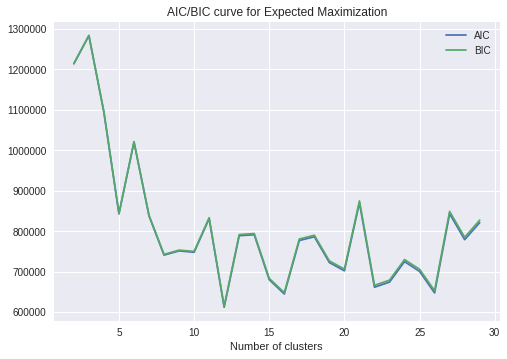

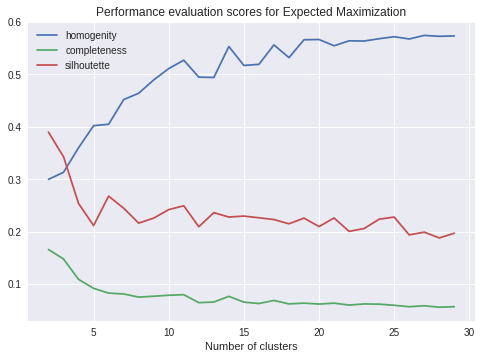

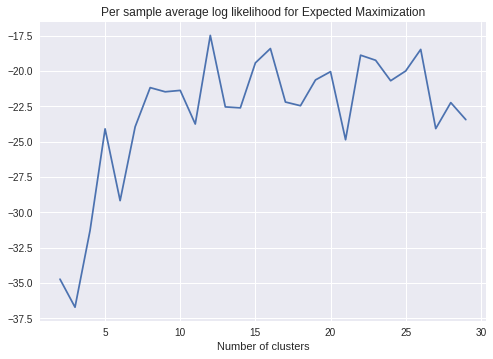

Training accuracy for Expected Maximization for K = 2:  83.87429160226687
Testing accuracy for Expected Maximization for K = 2:  83.68806499599496


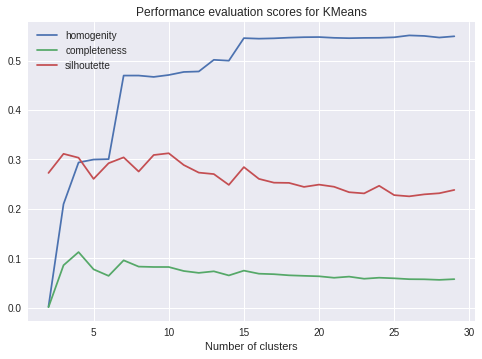

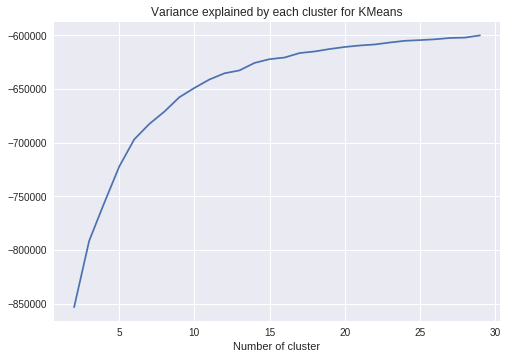

Training accuracy for KMeans for K = 2:  93.76609994848016
Testing accuracy for KMeans for K = 2:  94.08399130335279


/usr/local/lib/python3.6/dist-packages/sklearn/cluster/k_means_.py:971: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10
  return_n_iter=True)


([2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29],
 [0.002015840316897022,
  0.20962619705026583,
  0.293751492397294,
  0.29972577525532434,
  0.30056022897499696,
  0.4695663181000722,
  0.4695941473028025,
  0.4668160376633639,
  0.4707248535458495,
  0.4768509847922759,
  0.4778263532054584,
  0.5013854722953505,
  0.49965381556878485,
  0.5452570916472073,
  0.5441942486865157,
  0.5448871209447937,
  0.5462550104198525,
  0.5471680526462878,
  0.5474483825996821,
  0.5458945951250525,
  0.5451783018492469,
  0.5457613326999801,
  0.5459412888023397,
  0.5469853086159058,
  0.5507813937749638,
  0.5497152501851519,
  0.5465014954021359,
  0.5489884729302786],
 [0.0010432322035376022,
  0.08590037320557903,
  0.11253875767137446,
  0.07764558011672121,
  0.06445205235166014,
  0.09585731625456463,
  0.08316482389160874,
  0.0823835775689967,
  0.08235272990876738,
  0.07426

In [0]:



!pip install -U -q PyDrive
import os
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# 1. Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

# choose a local (colab) directory to store the data.
local_download_path = os.path.expanduser('~/ColabNotebook/data/')
try:
    os.makedirs(local_download_path)
except: pass

# 2. Auto-iterate using the query syntax
#    https://developers.google.com/drive/v2/web/search-parameters
file_list = drive.ListFile(
    {'q': "'14F-hzeJT0OehHFctfdSbZaTAZueokhND' in parents"}).GetList()

for f in file_list:
  # 3. Create & download by id.
  print('title: %s, id: %s' % (f['title'], f['id']))
  fname = os.path.join(local_download_path, f['title'])
  print('downloading to {}'.format(fname))
  f_ = drive.CreateFile({'id': f['id']})
  f_.GetContentFile(fname)


with open(fname, 'r') as f:
    dataset = 'trainfinal.csv'
    data = pd.read_csv(f)

#drop 80% of entries for easy processing
features = [c for c in data.columns if c not in ['is_churn','msno']]
data_df, dropped_records, labels_df, dropped_features= train_test_split(data[features], data['is_churn'], test_size = 0.8, stratify=data['is_churn'])
data = pd.concat([data_df, labels_df], axis=1)
data.to_csv(index=True)

data_df['is_churn'] = labels_df
#Splitting data into training and testing and keeping testing data aside
X_train, X_test, y_train, y_test = train_test_split(data_df[features], data_df['is_churn'], test_size = 0.5, stratify=data_df['is_churn'])
# #Converting into numpy arrays
# X_train = X_train.as_matrix()
# X_test = X_test.as_matrix()
# y_train = y_train.as_matrix() - 1
# y_test = y_test.as_matrix() - 1


#Preprocessing the data between 0 and 1
scaler = preprocessing.StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

means_init = np.array([X_train[y_train == i].mean(axis=0) for i in range(2)])

##############################################################################################################################
#For Expected Maximization
em(X_train, X_test, y_train, y_test, init_means = means_init, component_list = [2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29], num_class = 2)

#############################################################################################################################
#For KMeans
kmeans(X_train, X_test, y_train, y_test, init_means = means_init, component_list = [2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29], num_class = 2)

title: churn.csv, id: 1rpIzRPYqX0AlY8Kfpj_V2-AtpF_6TbFJ
downloading to /root/ColabNotebook/data/churn.csv
title: churn.csv, id: 1EWNCpDfn1bHEWyp57IoTEeEavgldeiYQ
downloading to /root/ColabNotebook/data/churn.csv
Starting PCA
Dimensionality reduction
[5.79518262e-01 4.19012932e-01 1.07895095e-03 3.89838556e-04
 1.50155810e-08 1.05553010e-09 3.85438200e-10 2.21982662e-10
 1.41794587e-10 1.06835711e-11 5.09960155e-12 3.93066609e-12
 1.04924668e-12 8.56245285e-13 6.64586727e-13 5.61590240e-13
 3.11825485e-13 1.45362727e-13 4.51627968e-14 1.47593683e-14
 3.12671090e-15 7.91470276e-16 3.02601022e-16 4.47022527e-18
 1.06501205e-41]


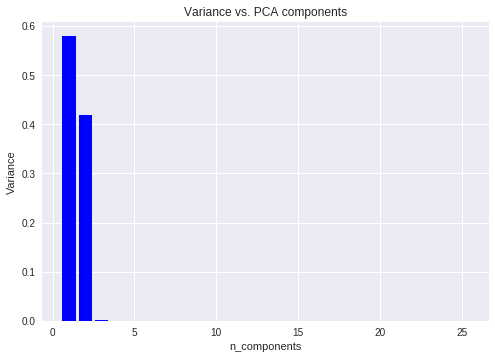

<Figure size 576x396 with 0 Axes>

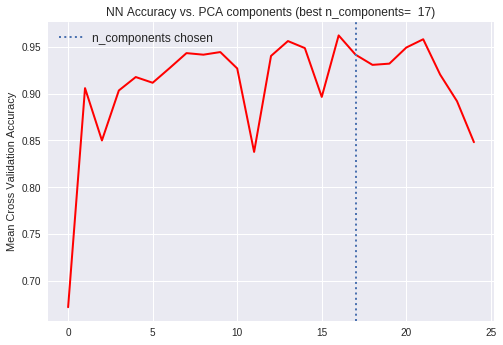

Clustering PCA
Expected Maximization


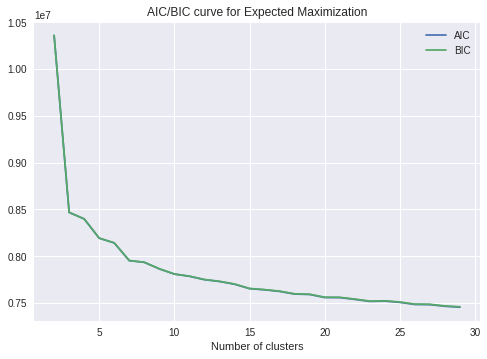

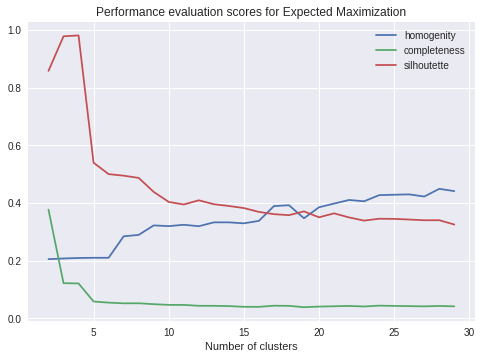

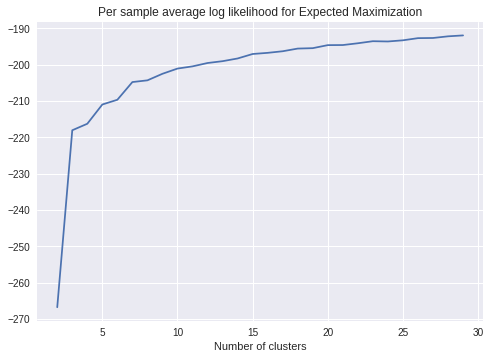

Training accuracy for Expected Maximization for K = 2:  92.93990421751892
Testing accuracy for Expected Maximization for K = 2:  93.1355888562748
KMeans


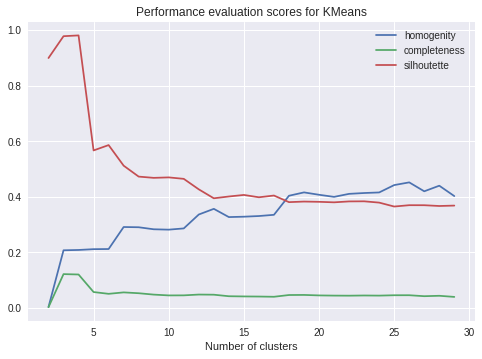

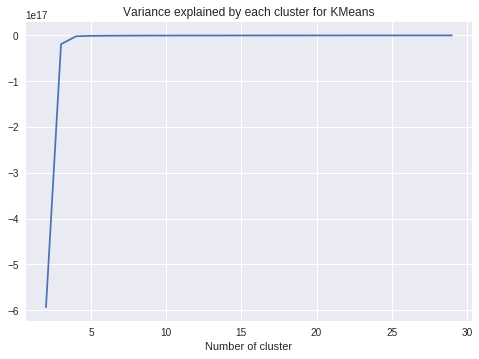

Training accuracy for KMeans for K = 2:  93.12014006900459
Testing accuracy for KMeans for K = 2:  93.3570214738143


/usr/local/lib/python3.6/dist-packages/sklearn/cluster/k_means_.py:971: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10
  return_n_iter=True)


In [0]:
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt
import csv
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.mixture import GaussianMixture
from sklearn import metrics
from sklearn import preprocessing
from sklearn.cluster import KMeans
from sklearn.datasets import load_digits
from sklearn.tree import DecisionTreeClassifier
from sklearn.decomposition import PCA
from sklearn.decomposition import FastICA
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
import scipy
from sklearn import random_projection

from sklearn.neural_network import MLPClassifier

!pip install -U -q PyDrive
import os
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# 1. Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

# choose a local (colab) directory to store the data.
local_download_path = os.path.expanduser('~/ColabNotebook/data/')
try:
    os.makedirs(local_download_path)
except: pass

# 2. Auto-iterate using the query syntax
#    https://developers.google.com/drive/v2/web/search-parameters
file_list = drive.ListFile(
    {'q': "'14F-hzeJT0OehHFctfdSbZaTAZueokhND' in parents"}).GetList()

for f in file_list:
  # 3. Create & download by id.
  print('title: %s, id: %s' % (f['title'], f['id']))
  fname = os.path.join(local_download_path, f['title'])
  print('downloading to {}'.format(fname))
  f_ = drive.CreateFile({'id': f['id']})
  f_.GetContentFile(fname)


with open(fname, 'r') as f:
    dataset = 'trainfinal.csv'
    data = pd.read_csv(f)

#drop 80% of entries for easy processing
features = [c for c in data.columns if c not in ['is_churn','msno']]
data_df, dropped_records, labels_df, dropped_features= train_test_split(data[features], data['is_churn'], test_size = 0.8, stratify=data['is_churn'])
data = pd.concat([data_df, labels_df], axis=1)
data.to_csv(index=True)

data_df['is_churn'] = labels_df
#Splitting data into training and testing and keeping testing data aside
X_train, X_test, y_train, y_test = train_test_split(data_df[features], data_df['is_churn'], test_size = 0.5, stratify=data_df['is_churn'])


########################################################################################################################
########################################################################################################################
#Dimensionality reduction PCA


print("Starting PCA")
print("Dimensionality reduction")

# decisiontree = DecisionTreeClassifier(criterion = 'gini', max_depth = 10, min_samples_split = 5)
#neural network learner
decisiontree = MLPClassifier(hidden_layer_sizes=(25),max_iter=500)
pca = PCA()

pipe = Pipeline(steps=[('pca', pca), ('decisionTree', decisiontree)])

# Plot the PCA spectrum
pca.fit(data_df[features])
print(pca.explained_variance_ratio_)
fig, ax = plt.subplots()
ax.bar(list(range(1,26)), pca.explained_variance_ratio_, linewidth=2, color = 'blue')
plt.axis('tight')
plt.xlabel('n_components')
plt.title('Variance vs. PCA components')
ax.set_ylabel('Variance')


#Checking the accuracy for taking all combination of components
n_components = range(1, 26)
# Parameters of pipelines can be set using ‘__’ separated parameter names:
gridSearch = GridSearchCV(pipe, dict(pca__n_components=n_components), cv = 3)
gridSearch.fit(data_df[features], data_df['is_churn'])
results = gridSearch.cv_results_
# ax1 = ax.twinx()
plt.show()

plt.figure()
fig, ax = plt.subplots()
#Plotting the accuracies and best component
ax.plot(results['mean_test_score'], linewidth = 2, color = 'red')
ax.set_ylabel('Mean Cross Validation Accuracy')
ax.axvline(gridSearch.best_estimator_.named_steps['pca'].n_components, linestyle=':', label='n_components chosen', linewidth = 2)

plt.legend(prop=dict(size=12))
plt.title('NN Accuracy vs. PCA components (best n_components=  %d)'%gridSearch.best_estimator_.named_steps['pca'].n_components )
plt.show()

#Reducing the dimensions with optimal number of components
pca_new = PCA(n_components = gridSearch.best_estimator_.named_steps['pca'].n_components)
pca_new.fit(X_train)
X_train_transformed = pca_new.transform(X_train)
X_test_transformed = pca_new.transform(X_test)


###############################################################################################################################
#Reconstruction Error

# print("Calculating Reconstruction Error")


# reconstruction_error = []
# for comp in n_components:

# 	pca = PCA(n_components = comp)
# 	X_transformed = pca.fit_transform(X_train)
# 	X_projected = pca.inverse_transform(X_transformed)
# 	reconstruction_error.append(((X_train - X_projected) ** 2).mean())

# 	if(comp == gridSearch.best_estimator_.named_steps['pca'].n_components):
# 		chosen_error = ((X_train - X_projected) ** 2).mean()

# fig2,ax2 = plt.subplots()
# ax2.plot(n_components, reconstruction_error, linewidth= 2)
# ax2.axvline(gridSearch.best_estimator_.named_steps['pca'].n_components, linestyle=':', label='n_components chosen', linewidth = 2)
# plt.axis('tight')
# plt.xlabel('Number of components')
# plt.ylabel('Reconstruction Error')
# plt.title('Reconstruction error for n_components chosen %f '%chosen_error)
# plt.show()

################################################################################################################################
#Clustering after dimensionality reduction

print("Clustering PCA")

#Reducing the dimensions with optimal number of components
pca_new = PCA(n_components = gridSearch.best_estimator_.named_steps['pca'].n_components)
pca_new.fit(data_df[features])
X_transformed_f = pca_new.transform(data_df[features])


means_init = np.array([X_transformed_f[data_df['is_churn'] == i].mean(axis=0) for i in range(2)])

#clustering experiments
print("Expected Maximization")
component_list, array_aic, array_bic, array_homo_1, array_comp_1, array_sil_1, array_avg_log = em(X_train_transformed, X_test_transformed, y_train, y_test, init_means = means_init, component_list = [2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29], num_class = 2, toshow =1)

print("KMeans")
component_list, array_homo_2, array_comp_2, array_sil_2, array_var = kmeans(X_train_transformed, X_test_transformed, y_train, y_test, init_means = means_init, component_list = [2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29], num_class = 2, toshow =1)


# #Writing data to file
# component_list = np.array(component_list).reshape(-1,1)
# array_aic = np.array(array_aic).reshape(-1,1)
# array_bic = np.array(array_bic).reshape(-1,1)
# array_homo_1 = np.array(array_homo_1).reshape(-1,1)
# array_comp_1 = np.array(array_comp_1).reshape(-1,1)
# array_sil_1 = np.array(array_sil_1).reshape(-1,1)
# array_avg_log = np.array(array_avg_log).reshape(-1,1)
# array_homo_2 = np.array(array_homo_2).reshape(-1,1)
# array_comp_2 = np.array(array_comp_2).reshape(-1,1)
# array_sil_2 = np.array(array_sil_2).reshape(-1,1)
# array_var = np.array(array_var).reshape(-1,1)

# # reconstruction_error = np.array(reconstruction_error).reshape(-1,1)

# data_em_pca_covtype = np.concatenate((component_list, array_aic, array_bic, array_homo_1, array_comp_1, array_sil_1, array_avg_log), axis =1)

# data_km_pca_covtype = np.concatenate((component_list, array_homo_2, array_sil_2, array_var), axis =1)

# # reconstruction_error_pca_covtype = np.concatenate((np.arange(1,29).reshape(-1,1), reconstruction_error), axis = 1)

# file = './data/data_em_pca_covtype.csv'
# with open(file, 'w', newline = '') as output:
# 	writer = csv.writer(output, delimiter=',')
# 	writer.writerows(data_em_pca_covtype)

# file = './data/data_km_pca_covtype.csv'
# with open(file, 'w', newline = '') as output:
# 	writer = csv.writer(output, delimiter=',')
# 	writer.writerows(data_km_pca_covtype)

# file = './data/reconstruction_error_pca_covtype.csv'
# with open(file, 'w', newline = '') as output:
# 	writer = csv.writer(output, delimiter=',')
# 	writer.writerows(reconstruction_error_pca_covtype)






title: churn.csv, id: 1rpIzRPYqX0AlY8Kfpj_V2-AtpF_6TbFJ
downloading to /root/ColabNotebook/data/churn.csv
title: churn.csv, id: 1EWNCpDfn1bHEWyp57IoTEeEavgldeiYQ
downloading to /root/ColabNotebook/data/churn.csv
Starting ICA
Dimensionality reduction


/usr/local/lib/python3.6/dist-packages/sklearn/decomposition/fastica_.py:121: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/decomposition/fastica_.py:121: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/decomposition/fastica_.py:121: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/decomposition/fastica_.py:121: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  ConvergenceWarning)


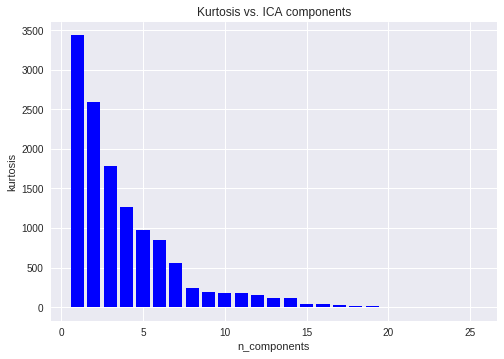

<Figure size 576x396 with 0 Axes>

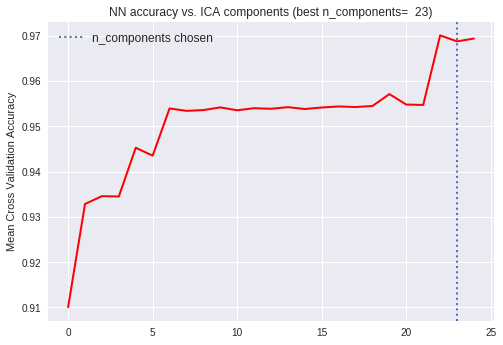

Clustering ICA
Expected Maximization
Training accuracy for Expected Maximization for K = 2:  15.33549616355116
Testing accuracy for Expected Maximization for K = 2:  15.314897780524229
KMeans


/usr/local/lib/python3.6/dist-packages/sklearn/cluster/k_means_.py:971: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10
  return_n_iter=True)


Training accuracy for KMeans for K = 2:  93.5733044955971
Testing accuracy for KMeans for K = 2:  93.76898913435295


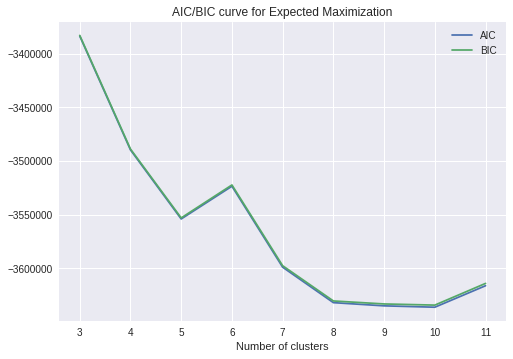

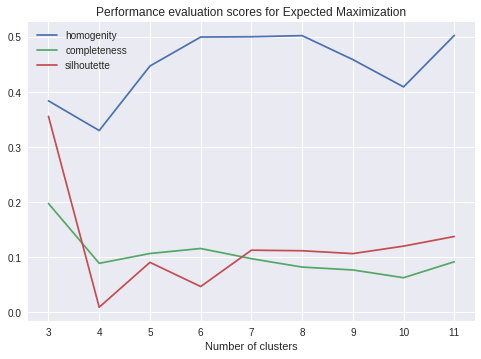

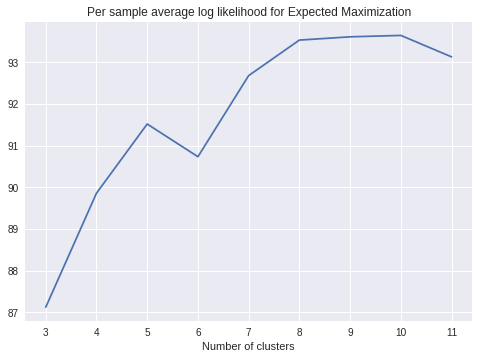

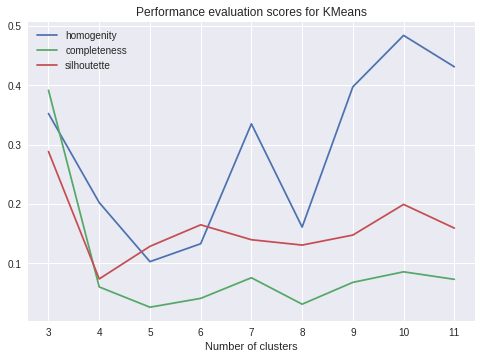

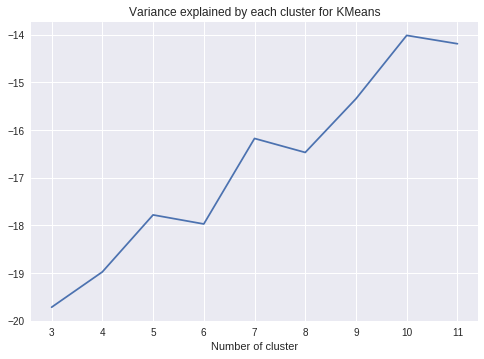

In [0]:
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt
import csv
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.mixture import GaussianMixture
from sklearn import metrics
from sklearn import preprocessing
from sklearn.cluster import KMeans
from sklearn.datasets import load_digits
from sklearn.tree import DecisionTreeClassifier
from sklearn.decomposition import PCA
from sklearn.decomposition import FastICA
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
import scipy
from sklearn import random_projection


!pip install -U -q PyDrive
import os
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# 1. Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

# choose a local (colab) directory to store the data.
local_download_path = os.path.expanduser('~/ColabNotebook/data/')
try:
    os.makedirs(local_download_path)
except: pass

# 2. Auto-iterate using the query syntax
#    https://developers.google.com/drive/v2/web/search-parameters
file_list = drive.ListFile(
    {'q': "'14F-hzeJT0OehHFctfdSbZaTAZueokhND' in parents"}).GetList()

for f in file_list:
  # 3. Create & download by id.
  print('title: %s, id: %s' % (f['title'], f['id']))
  fname = os.path.join(local_download_path, f['title'])
  print('downloading to {}'.format(fname))
  f_ = drive.CreateFile({'id': f['id']})
  f_.GetContentFile(fname)


with open(fname, 'r') as f:
    dataset = 'trainfinal.csv'
    data = pd.read_csv(f)

#drop 80% of entries for easy processing
features = [c for c in data.columns if c not in ['is_churn','msno']]
data_df, dropped_records, labels_df, dropped_features= train_test_split(data[features], data['is_churn'], test_size = 0.8, stratify=data['is_churn'])
data = pd.concat([data_df, labels_df], axis=1)
data.to_csv(index=True)

data_df['is_churn'] = labels_df
#Splitting data into training and testing and keeping testing data aside
X_train, X_test, y_train, y_test = train_test_split(data_df[features], data_df['is_churn'], test_size = 0.5, stratify=data_df['is_churn'])


X = data[features]
y = data['is_churn']

X_f = data[features]
y_f = data['is_churn']

########################################################################################################################
########################################################################################################################
#Dimensionality reduction ICA
#kurtosis calculation

print("Starting ICA")
print("Dimensionality reduction")

def _calculate(X, ica_, n_components):
    
    components = ica_.components_
    ica_.components_ = components[:n_components]

    transformed = ica_.transform(X)
    ica_.components_ = components
 
    kurtosis = scipy.stats.kurtosis(transformed)

    return sorted(kurtosis, reverse = True)	



# decisiontree = DecisionTreeClassifier(criterion = 'gini', max_depth = 10, min_samples_split = 5)
decisiontree = MLPClassifier(hidden_layer_sizes=(25),max_iter=500)
ica = FastICA()

pipe = Pipeline(steps=[('ica', ica), ('decisionTree', decisiontree)])

# Plot the ICA spectrum
ica.fit(X)

fig, ax = plt.subplots()
ax.bar(list(range(1,26)), _calculate(X,ica, 25) , linewidth=2, color = 'blue')
plt.axis('tight')
plt.xlabel('n_components')
ax.set_ylabel('kurtosis')
plt.title('Kurtosis vs. ICA components')

#Checking the accuracy for taking all combination of components
n_components = range(1, 26)
# Parameters of pipelines can be set using ‘__’ separated parameter names:
gridSearch = GridSearchCV(pipe, dict(ica__n_components=n_components), cv = 3)
gridSearch.fit(X, y)
results = gridSearch.cv_results_
# ax1 = ax.twinx()

plt.figure()
fig, ax = plt.subplots()
#Plotting the accuracies and best component
ax.plot(results['mean_test_score'], linewidth = 2, color = 'red')
ax.set_ylabel('Mean Cross Validation Accuracy')
ax.axvline(gridSearch.best_estimator_.named_steps['ica'].n_components, linestyle=':', label='n_components chosen', linewidth = 2)
plt.legend(prop=dict(size=12))
plt.title('NN accuracy vs. ICA components (best n_components=  %d)'%gridSearch.best_estimator_.named_steps['ica'].n_components )
plt.show()


#Reducing the dimensions with optimal number of components
ica_new = FastICA(n_components = gridSearch.best_estimator_.named_steps['ica'].n_components)
ica_new.fit(X_train)
X_train_transformed = ica_new.transform(X_train)
X_test_transformed = ica_new.transform(X_test)


###############################################################################################################################
#Reconstruction Error

# print("Calculating Reconstruction Error")


# reconstruction_error = []
# for comp in n_components:

# 	ica = FastICA(n_components = comp)
# 	X_transformed = ica.fit_transform(X_train)
# 	X_projected = ica.inverse_transform(X_transformed)
# 	reconstruction_error.append(((X_train - X_projected) ** 2).mean())

# 	if(comp == gridSearch.best_estimator_.named_steps['ica'].n_components):
# 		chosen_error = ((X_train - X_projected) ** 2).mean()

# fig2,ax2 = plt.subplots()
# ax2.plot(n_components, reconstruction_error, linewidth= 2)
# ax2.axvline(gridSearch.best_estimator_.named_steps['ica'].n_components, linestyle=':', label='n_components chosen', linewidth = 2)
# plt.axis('tight')
# plt.xlabel('Number of components')
# plt.ylabel('Reconstruction Error')
# plt.title('Reconstruction error for n_components chosen %f '%chosen_error)
# plt.show()

################################################################################################################################
#Dimensionally reduce the full dataset
#Reducing the dimensions with optimal number of components
ica_new = FastICA(n_components = gridSearch.best_estimator_.named_steps['ica'].n_components)
ica_new.fit(X_f)
X_transformed_f = ica_new.transform(X_f)


#Clustering after dimensionality reduction
print("Clustering ICA")


means_init = np.array([X_transformed_f[y_f == i].mean(axis=0) for i in range(2)])

#clustering experiments
print("Expected Maximization")
component_list, array_aic, array_bic, array_homo_1, array_comp_1, array_sil_1, array_avg_log = em(X_train_transformed, X_test_transformed, y_train, y_test, init_means = means_init, component_list = [3,4,5,6,7,8,9,10,11], num_class = 2, toshow =0)

print("KMeans")
component_list, array_homo_2, array_comp_2, array_sil_2, array_var = kmeans(X_train_transformed, X_test_transformed, y_train, y_test, init_means = means_init, component_list = [3,4,5,6,7,8,9,10,11], num_class = 2, toshow = 0)

# #Writing data to file
# component_list = np.array(component_list).reshape(-1,1)
# array_aic = np.array(array_aic).reshape(-1,1)
# array_bic = np.array(array_bic).reshape(-1,1)
# array_homo_1 = np.array(array_homo_1).reshape(-1,1)
# array_comp_1 = np.array(array_comp_1).reshape(-1,1)
# array_sil_1 = np.array(array_sil_1).reshape(-1,1)
# array_avg_log = np.array(array_avg_log).reshape(-1,1)
# array_homo_2 = np.array(array_homo_2).reshape(-1,1)
# array_comp_2 = np.array(array_comp_2).reshape(-1,1)
# array_sil_2 = np.array(array_sil_2).reshape(-1,1)
# array_var = np.array(array_var).reshape(-1,1)

# # reconstruction_error = np.array(reconstruction_error).reshape(-1,1)

# data_em_ica_covtype = np.concatenate((component_list, array_aic, array_bic, array_homo_1, array_comp_1, array_sil_1, array_avg_log), axis =1)

# data_km_ica_covtype = np.concatenate((component_list, array_homo_2, array_sil_2, array_var), axis =1)

# # reconstruction_error_ica_covtype = np.concatenate((np.arange(1,55).reshape(-1,1), reconstruction_error), axis = 1)

# file = './data/data_em_ica_covtype.csv'
# with open(file, 'w', newline = '') as output:
# 	writer = csv.writer(output, delimiter=',')
# 	writer.writerows(data_em_ica_covtype)

# file = './data/data_km_ica_covtype.csv'
# with open(file, 'w', newline = '') as output:
# 	writer = csv.writer(output, delimiter=',')
# 	writer.writerows(data_km_ica_covtype)

# file = './data/reconstruction_error_ica_covtype.csv'
# with open(file, 'w', newline = '') as output:
# 	writer = csv.writer(output, delimiter=',')
# 	writer.writerows(reconstruction_error_ica_covtype)

title: churn.csv, id: 1rpIzRPYqX0AlY8Kfpj_V2-AtpF_6TbFJ
downloading to /root/ColabNotebook/data/churn.csv
title: churn.csv, id: 1EWNCpDfn1bHEWyp57IoTEeEavgldeiYQ
downloading to /root/ColabNotebook/data/churn.csv
Starting RP
Dimensionality reduction


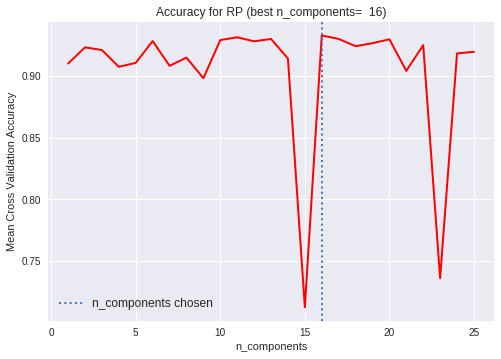

Clustering RP
Expected Maximization


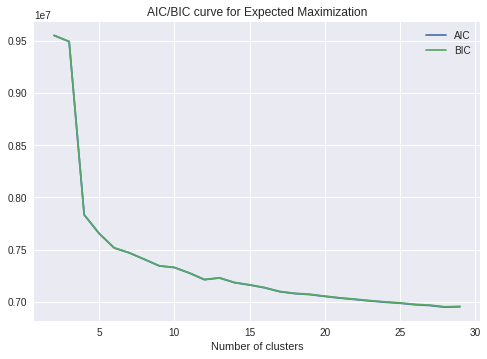

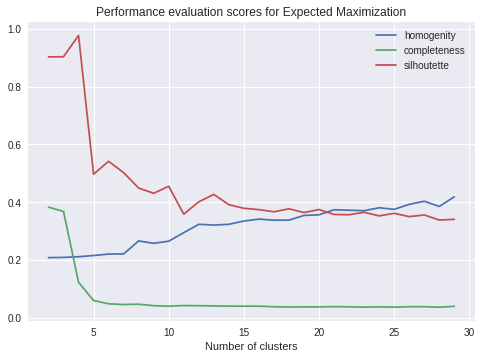

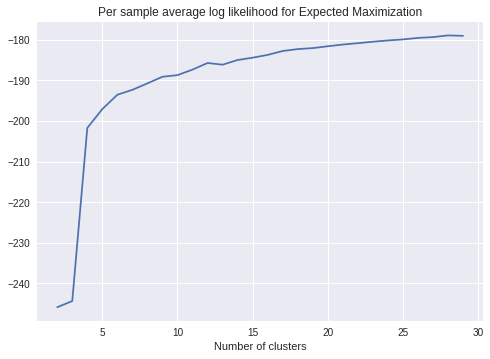

Training accuracy for Expected Maximization for K = 2:  91.00880580874401
Testing accuracy for Expected Maximization for K = 2:  91.00365621298728
KMeans


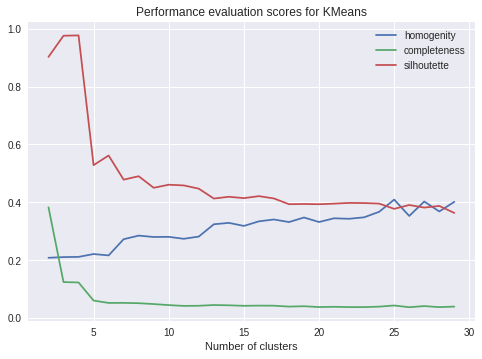

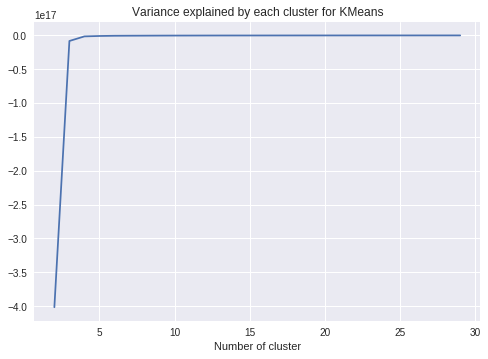

Training accuracy for KMeans for K = 2:  82.67161027859314
Testing accuracy for KMeans for K = 2:  82.93938925794325


/usr/local/lib/python3.6/dist-packages/sklearn/cluster/k_means_.py:971: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10
  return_n_iter=True)


In [0]:
import pandas as pd
import numpy as np
import time
import csv
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.mixture import GaussianMixture
from sklearn import metrics
from sklearn import preprocessing
from sklearn.cluster import KMeans
from sklearn.datasets import load_digits
from sklearn.tree import DecisionTreeClassifier
from sklearn.decomposition import PCA
from sklearn.decomposition import FastICA
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
import scipy
from sklearn import random_projection


!pip install -U -q PyDrive
import os
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# 1. Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

# choose a local (colab) directory to store the data.
local_download_path = os.path.expanduser('~/ColabNotebook/data/')
try:
    os.makedirs(local_download_path)
except: pass

# 2. Auto-iterate using the query syntax
#    https://developers.google.com/drive/v2/web/search-parameters
file_list = drive.ListFile(
    {'q': "'14F-hzeJT0OehHFctfdSbZaTAZueokhND' in parents"}).GetList()

for f in file_list:
  # 3. Create & download by id.
  print('title: %s, id: %s' % (f['title'], f['id']))
  fname = os.path.join(local_download_path, f['title'])
  print('downloading to {}'.format(fname))
  f_ = drive.CreateFile({'id': f['id']})
  f_.GetContentFile(fname)


with open(fname, 'r') as f:
    dataset = 'trainfinal.csv'
    data = pd.read_csv(f)

#drop 80% of entries for easy processing
features = [c for c in data.columns if c not in ['is_churn','msno']]
data_df, dropped_records, labels_df, dropped_features= train_test_split(data[features], data['is_churn'], test_size = 0.8, stratify=data['is_churn'])
data = pd.concat([data_df, labels_df], axis=1)
data.to_csv(index=True)

data_df['is_churn'] = labels_df
#Splitting data into training and testing and keeping testing data aside
X_train, X_test, y_train, y_test = train_test_split(data_df[features], data_df['is_churn'], test_size = 0.5, stratify=data_df['is_churn'])


X = data[features]
y = data['is_churn']

X_f = data[features]
y_f = data['is_churn']

###########################################################################################################################
###########################################################################################################################
#Random projections

print("Starting RP")
print("Dimensionality reduction")


# decisiontree = DecisionTreeClassifier(criterion = 'gini', max_depth = 10, min_samples_split = 5)
decisiontree = MLPClassifier(hidden_layer_sizes=(25),max_iter=500)
rp = random_projection.GaussianRandomProjection(n_components = 25)

pipe = Pipeline(steps=[('rp', rp), ('decisionTree', decisiontree)])

# Plot the ICA spectrum
rp.fit(X)

fig, ax = plt.subplots()

#Checking the accuracy for taking all combination of components
n_components = range(1, 26)
# Parameters of pipelines can be set using ‘__’ separated parameter names:
gridSearch = GridSearchCV(pipe, dict(rp__n_components=n_components), cv = 3)
gridSearch.fit(X, y)
results = gridSearch.cv_results_

#Plotting the accuracies and best component
plt.plot(n_components, results['mean_test_score'], linewidth = 2, color = 'red')
plt.ylabel('Mean Cross Validation Accuracy')
plt.xlabel('n_components')
ax.axvline(gridSearch.best_estimator_.named_steps['rp'].n_components, linestyle=':', label='n_components chosen', linewidth = 2)

plt.legend(prop=dict(size=12))
plt.title('Accuracy for RP (best n_components=  %d)'%gridSearch.best_estimator_.named_steps['rp'].n_components )
plt.show()


#Reducing the dimensions with optimal number of components
rp_new = random_projection.GaussianRandomProjection(n_components = gridSearch.best_estimator_.named_steps['rp'].n_components)
rp_new.fit(X_train)
X_train_transformed = rp_new.transform(X_train)
X_test_transformed = rp_new.transform(X_test)

###############################################################################################################################
#Reconstruction Error

# print("Calculating Reconstruction Error")

# def inverse_transform_rp(rp, X_transformed, X_train):

# 	return X_transformed.dot(rp.components_) + np.mean(X_train, axis = 0)



# reconstruction_error = []
# for comp in n_components:

# 	rp = random_projection.GaussianRandomProjection(n_components = comp)
# 	X_transformed = rp.fit_transform(X_train)
# 	X_projected = inverse_transform_rp(rp, X_transformed, X_train)
# 	reconstruction_error.append(((X_train - X_projected) ** 2).mean())

# 	if(comp == gridSearch.best_estimator_.named_steps['rp'].n_components):
# 		chosen_error = ((X_train - X_projected) ** 2).mean()

# fig2,ax2 = plt.subplots()
# ax2.plot(n_components, reconstruction_error, linewidth= 2)
# ax2.axvline(gridSearch.best_estimator_.named_steps['rp'].n_components, linestyle=':', label='n_components chosen', linewidth = 2)
# plt.axis('tight')
# plt.xlabel('Number of components')
# plt.ylabel('Reconstruction Error')
# plt.title('Reconstruction error for n_components chosen %f '%chosen_error)
# plt.show()

################################################################################################################################
#Clustering after dimensionality reduction

#clustering experiments
rp_new = random_projection.GaussianRandomProjection(n_components = gridSearch.best_estimator_.named_steps['rp'].n_components)
rp_new.fit(X_f)
X_transformed_f = rp_new.transform(X_f)

means_init = np.array([X_transformed_f[y_f == i].mean(axis=0) for i in range(2)])

print("Clustering RP")

print("Expected Maximization")
component_list, array_aic, array_bic, array_homo_1, array_comp_1, array_sil_1, array_avg_log = em(X_train_transformed, X_test_transformed, y_train, y_test, init_means = means_init, component_list =[2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29], num_class = 2, toshow = 1)

print("KMeans")
component_list, array_homo_2, array_comp_2, array_sil_2, array_var = kmeans(X_train_transformed, X_test_transformed, y_train, y_test, init_means = means_init, component_list = [2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29], num_class = 2,toshow = 1)

# #Writing data to file
# component_list = np.array(component_list).reshape(-1,1)
# array_aic = np.array(array_aic).reshape(-1,1)
# array_bic = np.array(array_bic).reshape(-1,1)
# array_homo_1 = np.array(array_homo_1).reshape(-1,1)
# array_comp_1 = np.array(array_comp_1).reshape(-1,1)
# array_sil_1 = np.array(array_sil_1).reshape(-1,1)
# array_avg_log = np.array(array_avg_log).reshape(-1,1)
# array_homo_2 = np.array(array_homo_2).reshape(-1,1)
# array_comp_2 = np.array(array_comp_2).reshape(-1,1)
# array_sil_2 = np.array(array_sil_2).reshape(-1,1)
# array_var = np.array(array_var).reshape(-1,1)

# reconstruction_error = np.array(reconstruction_error).reshape(-1,1)

# data_em_rp_covtype = np.concatenate((component_list, array_aic, array_bic, array_homo_1, array_comp_1, array_sil_1, array_avg_log), axis =1)

# data_km_rp_covtype = np.concatenate((component_list, array_homo_2, array_sil_2, array_var), axis =1)

# # reconstruction_error_rp_covtype = np.concatenate((np.arange(1,26).reshape(-1,1), reconstruction_error), axis = 1)

# file = './data/data_em_rp_covtype.csv'
# with open(file, 'w', newline = '') as output:
# 	writer = csv.writer(output, delimiter=',')
# 	writer.writerows(data_em_rp_covtype)

# file = './data/data_km_rp_covtype.csv'
# with open(file, 'w', newline = '') as output:
# 	writer = csv.writer(output, delimiter=',')
# 	writer.writerows(data_km_rp_covtype)

# file = './data/reconstruction_error_rp_covtype.csv'
# with open(file, 'w', newline = '') as output:
# 	writer = csv.writer(output, delimiter=',')
# 	writer.writerows(reconstruction_error_rp_covtype)

title: churn.csv, id: 1rpIzRPYqX0AlY8Kfpj_V2-AtpF_6TbFJ
downloading to /root/ColabNotebook/data/churn.csv
title: churn.csv, id: 1EWNCpDfn1bHEWyp57IoTEeEavgldeiYQ
downloading to /root/ColabNotebook/data/churn.csv
Starting FA
Dimensionality reduction


/usr/local/lib/python3.6/dist-packages/sklearn/decomposition/factor_analysis.py:238: ConvergenceWarning: FactorAnalysis did not converge. You might want to increase the number of iterations.
  ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/decomposition/factor_analysis.py:238: ConvergenceWarning: FactorAnalysis did not converge. You might want to increase the number of iterations.
  ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/decomposition/factor_analysis.py:238: ConvergenceWarning: FactorAnalysis did not converge. You might want to increase the number of iterations.
  ConvergenceWarning)


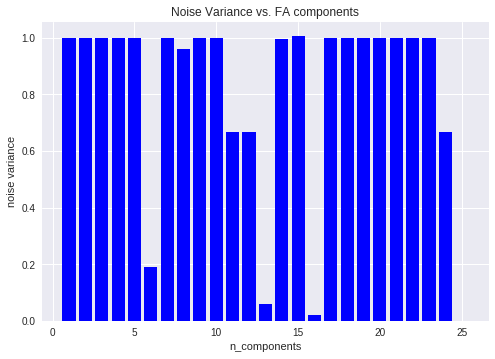

<Figure size 576x396 with 0 Axes>

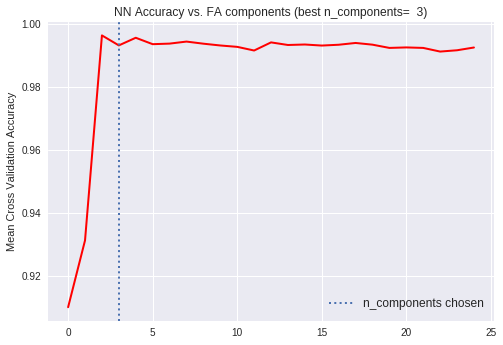

Clustering FA
Expected Maximization


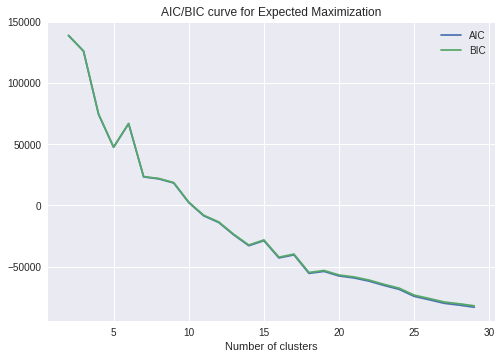

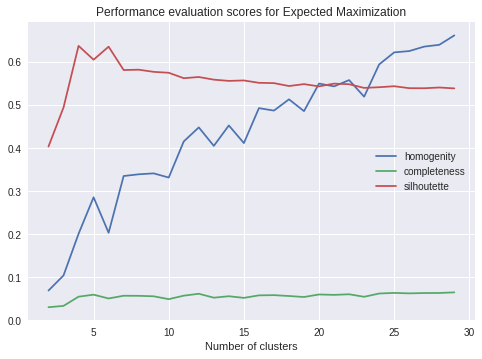

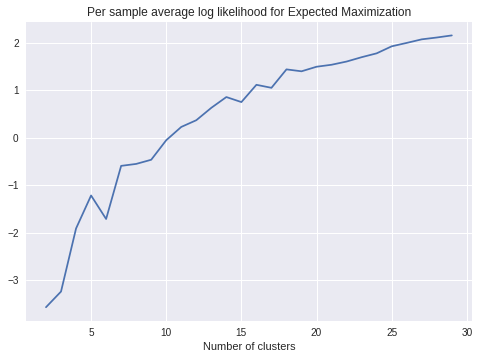

Training accuracy for Expected Maximization for K = 2:  82.55316957618827
Testing accuracy for Expected Maximization for K = 2:  82.85184613007878
KMeans


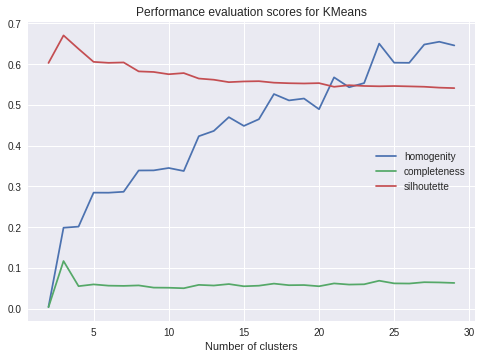

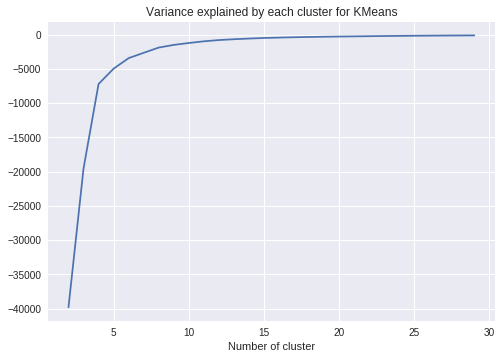

Training accuracy for KMeans for K = 2:  93.03259694114013
Testing accuracy for KMeans for K = 2:  93.21798238838251


/usr/local/lib/python3.6/dist-packages/sklearn/cluster/k_means_.py:971: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10
  return_n_iter=True)


In [0]:
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt
import csv
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.mixture import GaussianMixture
from sklearn import metrics
from sklearn import preprocessing
from sklearn.cluster import KMeans
from sklearn.datasets import load_digits
from sklearn.tree import DecisionTreeClassifier
from sklearn.decomposition import PCA
from sklearn.decomposition import FastICA
from sklearn.decomposition import FactorAnalysis
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
import scipy
from sklearn import random_projection


!pip install -U -q PyDrive
import os
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# 1. Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

# choose a local (colab) directory to store the data.
local_download_path = os.path.expanduser('~/ColabNotebook/data/')
try:
    os.makedirs(local_download_path)
except: pass

# 2. Auto-iterate using the query syntax
#    https://developers.google.com/drive/v2/web/search-parameters
file_list = drive.ListFile(
    {'q': "'14F-hzeJT0OehHFctfdSbZaTAZueokhND' in parents"}).GetList()

for f in file_list:
  # 3. Create & download by id.
  print('title: %s, id: %s' % (f['title'], f['id']))
  fname = os.path.join(local_download_path, f['title'])
  print('downloading to {}'.format(fname))
  f_ = drive.CreateFile({'id': f['id']})
  f_.GetContentFile(fname)


with open(fname, 'r') as f:
    dataset = 'trainfinal.csv'
    data = pd.read_csv(f)

#drop 80% of entries for easy processing
features = [c for c in data.columns if c not in ['is_churn','msno']]
data_df, dropped_records, labels_df, dropped_features= train_test_split(data[features], data['is_churn'], test_size = 0.8, stratify=data['is_churn'])
data = pd.concat([data_df, labels_df], axis=1)
data.to_csv(index=True)

data_df['is_churn'] = labels_df
#Splitting data into training and testing and keeping testing data aside
X_train, X_test, y_train, y_test = train_test_split(data_df[features], data_df['is_churn'], test_size = 0.5, stratify=data_df['is_churn'])


X = data[features]
y = data['is_churn']

X_f = data[features]
y_f = data['is_churn']

#######################################################################################################################
#######################################################################################################################
# Dimensionality reduction PCA


print("Starting FA")
print("Dimensionality reduction")

# decisiontree = DecisionTreeClassifier(criterion = 'gini', max_depth = 10, min_samples_split = 5)
decisiontree = MLPClassifier(hidden_layer_sizes=(25),max_iter=500)
fa = FactorAnalysis(max_iter = 100)

pipe = Pipeline(steps=[('fa', fa), ('decisionTree', decisiontree)])

# Plot the PCA spectrum
fa.fit(X)

fig, ax = plt.subplots()
ax.bar(list(range(1,26)), fa.noise_variance_, linewidth=2, color = 'blue')
plt.axis('tight')
plt.xlabel('n_components')
ax.set_ylabel('noise variance')
plt.title('Noise Variance vs. FA components')

#Checking the accuracy for taking all combination of components
plt.figure()
fig, ax = plt.subplots()
n_components = range(1, 26)
# Parameters of pipelines can be set using ‘__’ separated parameter names:
gridSearch = GridSearchCV(pipe, dict(fa__n_components=n_components), cv = 3)
gridSearch.fit(X, y)
results = gridSearch.cv_results_
# ax1 = ax.twinx()

#Plotting the accuracies and best component
ax.plot(results['mean_test_score'], linewidth = 2, color = 'red')
ax.set_ylabel('Mean Cross Validation Accuracy')
ax.axvline(gridSearch.best_estimator_.named_steps['fa'].n_components, linestyle=':', label='n_components chosen', linewidth = 2)

plt.legend(prop=dict(size=12))
plt.title('NN Accuracy vs. FA components (best n_components=  %d)'%gridSearch.best_estimator_.named_steps['fa'].n_components )
plt.show()

#Reducing the dimensions with optimal number of components
fa_new = FactorAnalysis(n_components = gridSearch.best_estimator_.named_steps['fa'].n_components, max_iter = 100)
fa_new.fit(X_train)
X_train_transformed = fa_new.transform(X_train)
X_test_transformed = fa_new.transform(X_test)


###############################################################################################################################
#Reconstruction Error

# print("Calculating Reconstruction Error")

# def inverse_transform_fa(fa, X_transformed, X_train):

# 	return X_transformed.dot(fa.components_) + np.mean(X_train, axis = 0)

# reconstruction_error = []

# for comp in n_components:

# 	fa = FactorAnalysis(n_components = comp, max_iter = 100)
# 	X_transformed = fa.fit_transform(X_train)
# 	X_projected = inverse_transform_fa(fa, X_transformed, X_train)
# 	reconstruction_error.append(((X_train - X_projected) ** 2).mean())

# 	if(comp == gridSearch.best_estimator_.named_steps['fa'].n_components):
# 		chosen_error = ((X_train - X_projected) ** 2).mean()

# fig2,ax2 = plt.subplots()
# ax2.plot(n_components, reconstruction_error, linewidth= 2)
# ax2.axvline(gridSearch.best_estimator_.named_steps['fa'].n_components, linestyle=':', label='n_components chosen', linewidth = 2)
# plt.axis('tight')
# plt.xlabel('Number of components')
# plt.ylabel('Reconstruction Error')
# plt.title('Reconstruction error for n_components chosen %f '%chosen_error)
# plt.show()

################################################################################################################################
#Clustering after dimensionality reduction

print("Clustering FA")

#Reducing the dimensions with optimal number of components
fa_new = FactorAnalysis(n_components = gridSearch.best_estimator_.named_steps['fa'].n_components, max_iter = 100)
fa_new.fit(X_f)
X_transformed_f = fa_new.transform(X_f)


means_init = np.array([X_transformed_f[y_f == i].mean(axis=0) for i in range(2)])

#clustering experiments
print("Expected Maximization")
component_list, array_aic, array_bic, array_homo_1, array_comp_1, array_sil_1, array_avg_log = em(X_train_transformed, X_test_transformed, y_train, y_test, init_means = means_init, component_list = [2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29], num_class = 2, toshow = 1)

print("KMeans")
component_list, array_homo_2, array_comp_2, array_sil_2, array_var = kmeans(X_train_transformed, X_test_transformed, y_train, y_test, init_means = means_init, component_list = [2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29], num_class = 2, toshow = 1)

# #Writing data to file
# component_list = np.array(component_list).reshape(-1,1)
# array_aic = np.array(array_aic).reshape(-1,1)
# array_bic = np.array(array_bic).reshape(-1,1)
# array_homo_1 = np.array(array_homo_1).reshape(-1,1)
# array_comp_1 = np.array(array_comp_1).reshape(-1,1)
# array_sil_1 = np.array(array_sil_1).reshape(-1,1)
# array_avg_log = np.array(array_avg_log).reshape(-1,1)
# array_homo_2 = np.array(array_homo_2).reshape(-1,1)
# array_comp_2 = np.array(array_comp_2).reshape(-1,1)
# array_sil_2 = np.array(array_sil_2).reshape(-1,1)
# array_var = np.array(array_var).reshape(-1,1)

# reconstruction_error = np.array(reconstruction_error).reshape(-1,1)

# data_em_fa_covtype = np.concatenate((component_list, array_aic, array_bic, array_homo_1, array_comp_1, array_sil_1, array_avg_log), axis =1)

# data_km_fa_covtype = np.concatenate((component_list, array_homo_2, array_sil_2, array_var), axis =1)

# # reconstruction_error_fa_covtype = np.concatenate((np.arange(1,55).reshape(-1,1), reconstruction_error), axis = 1)

# file = './data/data_em_fa_covtype.csv'
# with open(file, 'w', newline = '') as output:
# 	writer = csv.writer(output, delimiter=',')
# 	writer.writerows(data_em_fa_covtype)

# file = './data/data_km_fa_covtype.csv'
# with open(file, 'w', newline = '') as output:
# 	writer = csv.writer(output, delimiter=',')
# 	writer.writerows(data_km_fa_covtype)

# file = './data/reconstruction_error_fa_covtype.csv'
# with open(file, 'w', newline = '') as output:
# 	writer = csv.writer(output, delimiter=',')
# 	writer.writerows(reconstruction_error_fa_covtype)

title: churn.csv, id: 1rpIzRPYqX0AlY8Kfpj_V2-AtpF_6TbFJ
downloading to /root/ColabNotebook/data/churn.csv
title: churn.csv, id: 1EWNCpDfn1bHEWyp57IoTEeEavgldeiYQ
downloading to /root/ColabNotebook/data/churn.csv
PCA....
Adding cluster label and checking accuracy


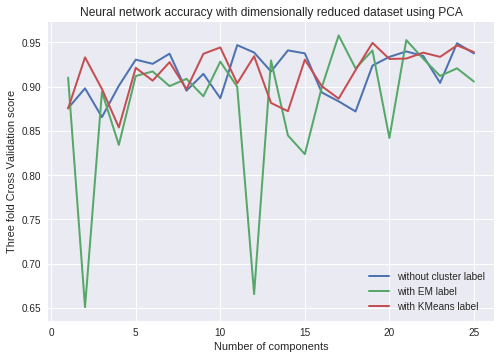

ICA...


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Adding Cluster label and checking accuracy


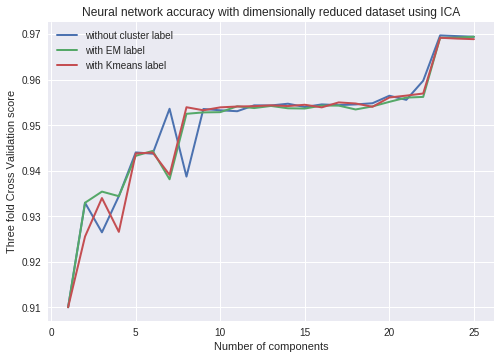

RP...


In [0]:
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.mixture import GaussianMixture
from sklearn import metrics
from sklearn import preprocessing
from sklearn.cluster import KMeans
from sklearn.datasets import load_digits
from sklearn.tree import DecisionTreeClassifier
from sklearn.decomposition import PCA
from sklearn.decomposition import FastICA
from sklearn.decomposition import FactorAnalysis
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
import scipy
from sklearn import random_projection

from sklearn.neural_network import MLPClassifier

!pip install -U -q PyDrive
import os
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# 1. Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

# choose a local (colab) directory to store the data.
local_download_path = os.path.expanduser('~/ColabNotebook/data/')
try:
    os.makedirs(local_download_path)
except: pass

# 2. Auto-iterate using the query syntax
#    https://developers.google.com/drive/v2/web/search-parameters
file_list = drive.ListFile(
    {'q': "'14F-hzeJT0OehHFctfdSbZaTAZueokhND' in parents"}).GetList()

for f in file_list:
  # 3. Create & download by id.
  print('title: %s, id: %s' % (f['title'], f['id']))
  fname = os.path.join(local_download_path, f['title'])
  print('downloading to {}'.format(fname))
  f_ = drive.CreateFile({'id': f['id']})
  f_.GetContentFile(fname)


with open(fname, 'r') as f:
    dataset = 'trainfinal.csv'
    data = pd.read_csv(f)

#drop 80% of entries for easy processing
features = [c for c in data.columns if c not in ['is_churn','msno']]
data_df, dropped_records, labels_df, dropped_features= train_test_split(data[features], data['is_churn'], test_size = 0.8, stratify=data['is_churn'])
data = pd.concat([data_df, labels_df], axis=1)
data.to_csv(index=True)

data_df['is_churn'] = labels_df
#Splitting data into training and testing and keeping testing data aside
X_train, X_test, y_train, y_test = train_test_split(data_df[features], data_df['is_churn'], test_size = 0.5, stratify=data_df['is_churn'])


X = data[features]
y = data['is_churn']

X_f = data[features]
y_f = data['is_churn']


n_classes = 2
##########################################################################################################
#PCA

print('PCA....')
time_pca = []
n_components_pca = range(1,26)
cv_score_pca = []
for comp_pca in n_components_pca:
	
	#Reducing the dimensions with optimal number of components
	pca_new = PCA(n_components = comp_pca)
	pca_new.fit(X_train)
	X_transformed_pca = pca_new.transform(X)
	nodes_hidden_layer = int((comp_pca + n_classes)/2)
	#neural network learner
	t1 = time.time()
	mlp = MLPClassifier(hidden_layer_sizes=(nodes_hidden_layer,),max_iter=500)

	cv_score_pca.append(np.mean(cross_val_score(mlp, X_transformed_pca, y, cv = 3)))

	t2 = time.time()

	time_pca.append((t2 - t1))


print('Adding cluster label and checking accuracy')

#Adding a cluster label as a feature

cv_score_em_pca = []
cv_score_km_pca = []
clf_em = GaussianMixture(n_components=n_classes,covariance_type='spherical', max_iter= 500, init_params= 'kmeans')
clf_km = KMeans(n_clusters= n_classes, init='k-means++')


for comp_pca in n_components_pca:
	
	nodes_hidden_layer = int((comp_pca + n_classes)/2)
	#neural network learner
	mlp = MLPClassifier(hidden_layer_sizes=(nodes_hidden_layer,),max_iter=500)

	#Reducing the dimensions with optimal number of components
	pca_new = PCA(n_components = comp_pca)
	pca_new.fit(X_train)
	X_transformed_pca = pca_new.transform(X)

	clf_em.fit(X_transformed_pca)
	cluster_em = clf_em.predict(X_transformed_pca)
	cluster_em = np.array(cluster_em).reshape(-1,1)

	X_transformed_em_pca = np.concatenate((X_transformed_pca, cluster_em), axis=1)
	

	cv_score_em_pca.append(np.mean(cross_val_score(mlp, X_transformed_em_pca, y, cv = 3)))


	clf_km.fit(X_transformed_pca)
	cluster_km = clf_km.predict(X_transformed_pca)
	cluster_km = np.array(cluster_km).reshape(-1,1)

	X_transformed_km_pca = np.concatenate((X_transformed_pca, cluster_km), axis=1)
	

	cv_score_km_pca.append(np.mean(cross_val_score(mlp, X_transformed_km_pca, y, cv = 3)))



#Plotting

fig1, ax1 = plt.subplots()
ax1.plot(n_components_pca, cv_score_pca, linewidth =2)
ax1.plot(n_components_pca, cv_score_em_pca, linewidth = 2)
ax1.plot(n_components_pca, cv_score_km_pca, linewidth = 2)
plt.legend(['without cluster label', 'with EM label', 'with KMeans label'])
plt.xlabel("Number of components")
plt.ylabel("Three fold Cross Validation score")
plt.title("Neural network accuracy with dimensionally reduced dataset using PCA")
plt.show()


##########################################################################################################
#ICA

print('ICA...')
n_components_ica = range(1,26)
cv_score_ica = []
time_ica = []
for comp_ica in n_components_ica:

	
	#Reducing the dimensions with optimal number of components
	ica_new = FastICA(n_components = comp_ica)
	ica_new.fit(X_train)
	X_transformed_ica = ica_new.transform(X)
	nodes_hidden_layer = int((comp_ica + n_classes)/2)
	#neural network learner
	t1 = time.time()
	mlp = MLPClassifier(hidden_layer_sizes=(nodes_hidden_layer,),max_iter=500)

	cv_score_ica.append(np.mean(cross_val_score(mlp, X_transformed_ica, y, cv = 3)))

	t2 = time.time()
	time_ica.append((t2 - t1))


#Adding a cluster label as a feature

print('Adding Cluster label and checking accuracy')
cv_score_em_ica = []
cv_score_km_ica = []
clf_em = GaussianMixture(n_components=n_classes, covariance_type='spherical', max_iter= 500, init_params= 'kmeans')
clf_km = KMeans(n_clusters= n_classes, init='k-means++')


for comp_ica in n_components_ica:
	
	nodes_hidden_layer = int((comp_ica + n_classes)/2)
	#neural network learner
	mlp = MLPClassifier(hidden_layer_sizes=(nodes_hidden_layer,),max_iter=500)

	#Reducing the dimensions with optimal number of components
	ica_new = FastICA(n_components = comp_ica)
	ica_new.fit(X_train)
	X_transformed_ica = ica_new.transform(X)

	clf_em.fit(X_transformed_ica)
	cluster_em = clf_em.predict(X_transformed_ica)
	cluster_em = np.array(cluster_em).reshape(-1,1)

	X_transformed_em_ica = np.concatenate((X_transformed_ica, cluster_em), axis=1)
	

	cv_score_em_ica.append(np.mean(cross_val_score(mlp, X_transformed_em_ica, y, cv = 3)))


	clf_km.fit(X_transformed_ica)
	cluster_km = clf_km.predict(X_transformed_ica)
	cluster_km = np.array(cluster_km).reshape(-1,1)

	X_transformed_km_ica = np.concatenate((X_transformed_ica, cluster_km), axis=1)
	

	cv_score_km_ica.append(np.mean(cross_val_score(mlp, X_transformed_km_ica, y, cv = 3)))



#Reducing the dimensions with optimal number of components
fig2, ax2 = plt.subplots()
ax2.plot(n_components_ica, cv_score_ica, linewidth = 2)
ax2.plot(n_components_ica, cv_score_em_ica, linewidth = 2)
ax2.plot(n_components_ica, cv_score_km_ica, linewidth = 2)
plt.legend(['without cluster label', 'with EM label', 'with Kmeans label'])
plt.xlabel("Number of components")
plt.ylabel("Three fold Cross Validation score")
plt.title("Neural network accuracy with dimensionally reduced dataset using ICA")
plt.show()


# ##########################################################################################################
#RP


print('RP...')
n_components_rp = range(1,26)
cv_score_rp = []

time_rp = []
for comp_rp in n_components_rp:

	#Reducing the dimensions with optimal number of components
	rp_new = random_projection.GaussianRandomProjection(n_components = comp_rp)
	rp_new.fit(X_train)
	X_transformed_rp = rp_new.transform(X)
	nodes_hidden_layer = int((comp_rp + n_classes)/2)
	#neural network learner
	t1 = time.time()
	mlp = MLPClassifier(hidden_layer_sizes=(nodes_hidden_layer,),max_iter=500)

	cv_score_rp.append(np.mean(cross_val_score(mlp, X_transformed_rp, y, cv = 3)))

	t2 = time.time()

	time_rp.append((t2 - t1))


#Adding a cluster label as a feature
print('Adding cluster label and checking accuracy')
cv_score_em_rp = []
cv_score_km_rp = []
clf_em = GaussianMixture(n_components=n_classes, covariance_type='spherical', max_iter= 500, init_params= 'kmeans')
clf_km = KMeans(n_clusters= n_classes, init='k-means++')


for comp_rp in n_components_rp:
	
	nodes_hidden_layer = int((comp_rp + n_classes)/2)
	#neural network learner
	mlp = MLPClassifier(hidden_layer_sizes=(nodes_hidden_layer,),max_iter=500)

	#Reducing the dimensions with optimal number of components
	rp_new = random_projection.GaussianRandomProjection(n_components = comp_rp)
	rp_new.fit(X_train)
	X_transformed_rp = rp_new.transform(X)

	clf_em.fit(X_transformed_rp)
	cluster_em = clf_em.predict(X_transformed_rp)
	cluster_em = np.array(cluster_em).reshape(-1,1)

	X_transformed_em_rp = np.concatenate((X_transformed_rp, cluster_em), axis=1)
	

	cv_score_em_rp.append(np.mean(cross_val_score(mlp, X_transformed_em_rp, y, cv = 3)))


	clf_km.fit(X_transformed_rp)
	cluster_km = clf_km.predict(X_transformed_rp)
	cluster_km = np.array(cluster_km).reshape(-1,1)

	X_transformed_km_rp = np.concatenate((X_transformed_rp, cluster_km), axis=1)
	

	cv_score_km_rp.append(np.mean(cross_val_score(mlp, X_transformed_km_rp, y, cv = 3)))


fig3, ax3 = plt.subplots()
ax3.plot(n_components_rp, cv_score_rp, linewidth= 2)
ax3.plot(n_components_rp, cv_score_em_rp, linewidth =2)
ax3.plot(n_components_rp, cv_score_km_rp, linewidth = 2)
plt.legend(['without cluster label', 'with EM label', 'with Kmeans label'])
plt.xlabel("Number of components")
plt.ylabel("Three fold Cross Validation score")
plt.title("Neural network accuracy with dimensionally reduced dataset using RP")
plt.show()

# ##########################################################################################################
#fa

print('FA...')
n_components_fa = range(1,26)
cv_score_fa = []

time_fa = []
for comp_fa in n_components_fa:

	#Reducing the dimensions with optimal number of components
	fa_new = FactorAnalysis(n_components = comp_fa, max_iter = 100)
	fa_new.fit(X_train)
	X_transformed_fa = fa_new.transform(X)
	nodes_hidden_layer = int((comp_fa + n_classes)/2)
	#neural network learner
	t1 = time.time()
	mlp = MLPClassifier(hidden_layer_sizes=(nodes_hidden_layer,),max_iter=500)

	cv_score_fa.append(np.mean(cross_val_score(mlp, X_transformed_fa, y, cv = 3)))

	t2 = time.time()

	time_fa.append((t2 - t1))



#Adding a cluster label as a feature

print('Adding cluster label and checking accuracy.')
cv_score_em_fa = []
cv_score_km_fa = []
clf_em = GaussianMixture(n_components=n_classes, covariance_type='spherical', max_iter= 500, init_params= 'kmeans')
clf_km = KMeans(n_clusters= n_classes, init='k-means++')


for comp_fa in n_components_fa:
	
	nodes_hidden_layer = int((comp_fa + n_classes)/2)
	#neural network learner
	mlp = MLPClassifier(hidden_layer_sizes=(nodes_hidden_layer,),max_iter=500)

	#Reducing the dimensions with optimal number of components
	fa_new = FactorAnalysis(n_components = comp_fa, max_iter = 100)
	fa_new.fit(X_train)
	X_transformed_fa = fa_new.transform(X)

	clf_em.fit(X_transformed_fa)
	cluster_em = clf_em.predict(X_transformed_fa)
	cluster_em = np.array(cluster_em).reshape(-1,1)

	X_transformed_em_fa = np.concatenate((X_transformed_fa, cluster_em), axis=1)
	

	cv_score_em_fa.append(np.mean(cross_val_score(mlp, X_transformed_em_fa, y, cv = 3)))


	clf_km.fit(X_transformed_fa)
	cluster_km = clf_km.predict(X_transformed_fa)
	cluster_km = np.array(cluster_km).reshape(-1,1)

	X_transformed_km_fa = np.concatenate((X_transformed_fa, cluster_km), axis=1)
	

	cv_score_km_fa.append(np.mean(cross_val_score(mlp, X_transformed_km_fa, y, cv = 3)))


fig4, ax4 = plt.subplots()
ax4.plot(n_components_fa, cv_score_fa, linewidth= 2)
ax4.plot(n_components_fa, cv_score_em_fa, linewidth =2)
ax4.plot(n_components_fa, cv_score_km_fa, linewidth =2)
plt.legend(['without cluster label', 'with EM label', 'with Kmeans label'])
plt.xlabel("Number of components")
plt.ylabel("Three fold Cross Validation score")
plt.title("Neural network accuracy with dimensionally reduced dataset using FA")
plt.show()


#############################################################################################################
#Plotting neural network time
#pca

print('plotting time graph')
fig5, ax5 = plt.subplots()
plt.plot(n_components_pca, time_pca, linewidth =2)
plt.plot(n_components_ica, time_ica, linewidth=2)
plt.plot(n_components_rp, time_rp, linewidth=2)
plt.plot(n_components_fa, time_fa, linewidth=2)
plt.legend(['PCA', 'ICA', 'RP', 'FA'])
plt.xlabel("Number of components")
plt.ylabel("Total training time for 3 fold CV")
plt.title("Neural network computation time after dimensionality reduction")
plt.show()



In [0]:
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt
import csv
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.mixture import GaussianMixture
from sklearn import metrics
from sklearn import preprocessing
from sklearn.cluster import KMeans
from sklearn.datasets import load_digits
from sklearn.tree import DecisionTreeClassifier
from sklearn.decomposition import PCA
from sklearn.decomposition import FastICA
from sklearn.decomposition import FactorAnalysis
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
import scipy
from sklearn import random_projection


!pip install -U -q PyDrive
import os
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# 1. Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

# choose a local (colab) directory to store the data.
local_download_path = os.path.expanduser('~/ColabNotebook/data/')
try:
    os.makedirs(local_download_path)
except: pass

# 2. Auto-iterate using the query syntax
#    https://developers.google.com/drive/v2/web/search-parameters
file_list = drive.ListFile(
    {'q': "'14F-hzeJT0OehHFctfdSbZaTAZueokhND' in parents"}).GetList()

for f in file_list:
  # 3. Create & download by id.
  print('title: %s, id: %s' % (f['title'], f['id']))
  fname = os.path.join(local_download_path, f['title'])
  print('downloading to {}'.format(fname))
  f_ = drive.CreateFile({'id': f['id']})
  f_.GetContentFile(fname)


with open(fname, 'r') as f:
    dataset = 'trainfinal.csv'
    data = pd.read_csv(f)

#drop 80% of entries for easy processing
features = [c for c in data.columns if c not in ['is_churn','msno']]
data_df, dropped_records, labels_df, dropped_features= train_test_split(data[features], data['is_churn'], test_size = 0.8, stratify=data['is_churn'])
data = pd.concat([data_df, labels_df], axis=1)
data.to_csv(index=True)

data_df['is_churn'] = labels_df
#Splitting data into training and testing and keeping testing data aside
X_train, X_test, y_train, y_test = train_test_split(data_df[features], data_df['is_churn'], test_size = 0.5, stratify=data_df['is_churn'])


X = data[features]
y = data['is_churn']

X_f = data[features]
y_f = data['is_churn']

n_classes = 2


#######################################################################################################################
#######################################################################################################################
# Dimensionality reduction PCA


print("Starting FA")
print("Dimensionality reduction")

# decisiontree = DecisionTreeClassifier(criterion = 'gini', max_depth = 10, min_samples_split = 5)
decisiontree = MLPClassifier(hidden_layer_sizes=(25),max_iter=500)
fa = FactorAnalysis(max_iter = 100)

pipe = Pipeline(steps=[('fa', fa), ('decisionTree', decisiontree)])

# Plot the PCA spectrum
fa.fit(X)

fig, ax = plt.subplots()
ax.bar(list(range(1,26)), fa.noise_variance_, linewidth=2, color = 'blue')
plt.axis('tight')
plt.xlabel('n_components')
ax.set_ylabel('noise variance')
plt.title('Noise Variance vs. FA components')

#Checking the accuracy for taking all combination of components
plt.figure()
fig, ax = plt.subplots()
n_components = range(1, 26)
# Parameters of pipelines can be set using ‘__’ separated parameter names:
gridSearch = GridSearchCV(pipe, dict(fa__n_components=n_components), cv = 3)
gridSearch.fit(X, y)
results = gridSearch.cv_results_
# ax1 = ax.twinx()


##############################################################################################################################
#Reconstruction Error

n_components = range(1, 26)
print("Calculating Reconstruction Error")


reconstruction_error = []
for comp in n_components:

	pca = PCA(n_components = comp)
	X_transformed = pca.fit_transform(X_train)
	X_projected = pca.inverse_transform(X_transformed)
	reconstruction_error.append(((X_train - X_projected) ** 2).mean())

	if(comp == gridSearch.best_estimator_.named_steps['pca'].n_components):
		chosen_error = ((X_train - X_projected) ** 2).mean()

fig2,ax2 = plt.subplots()
ax2.plot(n_components, reconstruction_error, linewidth= 2)
ax2.axvline(gridSearch.best_estimator_.named_steps['pca'].n_components, linestyle=':', label='n_components chosen', linewidth = 2)
plt.axis('tight')
plt.xlabel('Number of components')
plt.ylabel('Reconstruction Error')
plt.title('Reconstruction error for n_components chosen %f '%chosen_error)
plt.show()

title: churn.csv, id: 1rpIzRPYqX0AlY8Kfpj_V2-AtpF_6TbFJ
downloading to /root/ColabNotebook/data/churn.csv
title: churn.csv, id: 1EWNCpDfn1bHEWyp57IoTEeEavgldeiYQ
downloading to /root/ColabNotebook/data/churn.csv
Starting FA
Dimensionality reduction


/usr/local/lib/python3.6/dist-packages/sklearn/decomposition/factor_analysis.py:238: ConvergenceWarning: FactorAnalysis did not converge. You might want to increase the number of iterations.
  ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/decomposition/factor_analysis.py:238: ConvergenceWarning: FactorAnalysis did not converge. You might want to increase the number of iterations.
  ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/decomposition/factor_analysis.py:238: ConvergenceWarning: FactorAnalysis did not converge. You might want to increase the number of iterations.
  ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:564: UserWarning: Trainin